In [1]:
# from marketsim.simulator.sampled_arrival_simulator import SimulatorSampledArrival
from marketsim.simulator.shock_simulator import ShockSimulator
from marketsim.fourheap.constants import BUY, SELL
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

Figure 6.9.a - pg71

Notes: 
- some parameters left to interpretation
- doing both sides of shock for completeness
- Max difference
- scale on the graph is odd
- wont be able to achieve the straight line they did, why log scale?

Sell Side Shock:

In [17]:
%%time

plot_no_trend = {}
plot_trend = {}

for volatility in [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    print(f"volatility: {volatility}")
    for seed in range(20, 30):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        max_diff_nt = 0

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            max_diff_nt = max(max_diff_nt, abs(f[times_no_trend[i]] - prices_no_trend[i]))

        
        if volatility not in plot_no_trend.keys():
            plot_no_trend[volatility] = 0

        plot_no_trend[volatility] += max_diff_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        max_diff_t = 0

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            max_diff_t = max(max_diff_t, abs(f[times_trend[i]] - prices_trend[i]))

        if volatility not in plot_trend.keys():
            plot_trend[volatility] = 0

        plot_trend[volatility] += max_diff_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():
    X_nt.append(k)
    Y_nt.append(v / 10)


X_t = []
Y_t = []

for k, v in plot_trend.items():
    X_t.append(k)
    Y_t.append(v / 10)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental Volatility')
plt.ylabel('')
plt.title('Max Difference')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.9.a/"

# save plot
plt.savefig(base + f"6.6_SELL.png")


volatility: 10
    Seed: 20
    Seed: 21


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fb1d8487d30>>
Traceback (most recent call last):
  File "/Users/rishithseelam/Code/SURE-SRG/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


    Seed: 22
    Seed: 23
    Seed: 24
    Seed: 25


KeyboardInterrupt: 

Buy Side Shock: 

In [18]:
%%time

plot_no_trend = {}
plot_trend = {}

for volatility in [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    print(f"volatility: {volatility}")
    for seed in range(20, 30):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = BUY,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        max_diff_nt = 0

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            max_diff_nt = max(max_diff_nt, abs(f[times_no_trend[i]] - prices_no_trend[i]))

        
        if volatility not in plot_no_trend.keys():
            plot_no_trend[volatility] = 0

        plot_no_trend[volatility] += max_diff_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = BUY,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        max_diff_t = 0

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            max_diff_t = max(max_diff_t, abs(f[times_trend[i]] - prices_trend[i]))

        if volatility not in plot_trend.keys():
            plot_trend[volatility] = 0

        plot_trend[volatility] += max_diff_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    X_nt.append(k)
    Y_nt.append(v / 10)
   
X_t = []
Y_t = []

for k, v in plot_trend.items():

    X_t.append(k)
    Y_t.append(v / 10)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental Volatility')
plt.ylabel('')
plt.title('Max Difference')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.9.a/"

# save plot
plt.savefig(base + f"6.9.a_BUY.png")


volatility: 10
    Seed: 20
    Seed: 21


KeyboardInterrupt: 

Figure 6.9.b - pg 71

Notes: 
- some parameters left to interpretation
- doing both sides of shock for completeness
- Mispricing

Sell Side Shocks: 

In [32]:
%%time

plot_no_trend = {}
plot_trend = {}

for volatility in [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    print(f"volatility: {volatility}")
    for seed in range(20, 30):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )
        
        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

      
        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)
       
        if volatility not in plot_no_trend.keys():
            plot_no_trend[volatility] = 0

        plot_no_trend[volatility] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            squared_diff_t.append((f[times_trend[i]] - prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if volatility not in plot_trend.keys():
            plot_trend[volatility] = 0

        plot_trend[volatility] += rmsd_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    X_nt.append(k)
    Y_nt.append(v / 10)
    # print(k , v)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    X_t.append(k)
    Y_t.append(v / 10)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental Volatility')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.9.b/"

# save plot
plt.savefig(base + f"6.9.b_SELL.png")


volatility: 10
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
    Seed: 25
    Seed: 26
    Seed: 27
    Seed: 28
    Seed: 29
volatility: 50
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23


KeyboardInterrupt: 

Buy Side Shocks: 

volatility: 10
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
    Seed: 55
    Seed: 56
    Seed: 57
    Seed: 58
    Seed: 59
volatility: 50
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
    Seed: 55
    Seed: 56
    Seed: 57
    Seed: 58
    Seed: 59
volatility: 100
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
    Seed: 55
    Seed: 56
    Seed: 57
    Seed: 58
    Seed: 59
volatility: 200
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
    Seed: 55
    Seed: 56
    Seed: 57
    Seed: 58
    Seed: 59
volatility: 300
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
    Seed: 55
    Seed: 56
    Seed: 57
    Seed: 58
    Seed: 59
volatility: 400
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
    Seed: 55
    Seed: 56
    Seed: 57
    Seed: 58
    Seed: 59
volatility: 500
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
    Seed: 55
    Seed: 56
    Seed: 57
    Se

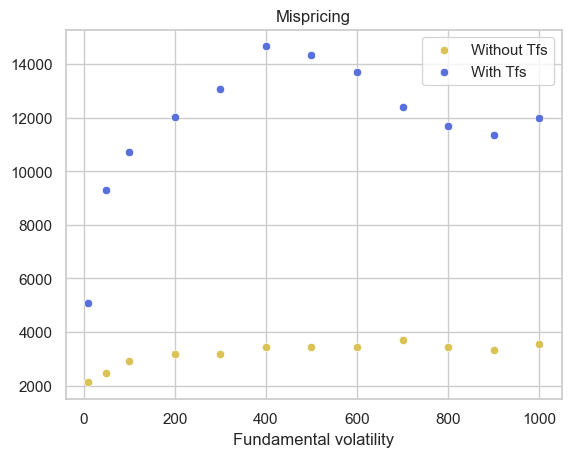

In [9]:
%%time

plot_no_trend = {}
plot_trend = {}

for volatility in [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    print(f"volatility: {volatility}")
    for seed in range(50, 60):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = BUY,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()
      
        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)
        
        if volatility not in plot_no_trend.keys():
            plot_no_trend[volatility] = 0

        plot_no_trend[volatility] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = BUY,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            squared_diff_t.append((f[times_trend[i]] - prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if volatility not in plot_trend.keys():
            plot_trend[volatility] = 0

        plot_trend[volatility] += rmsd_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    X_nt.append(k)
    Y_nt.append(v / 10)
    # print(k , v)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    X_t.append(k)
    Y_t.append(v / 10)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental volatility')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.9.b/"

# save plot
plt.savefig(base + f"6.9.b_BUY.png")

Figure 6.10.a - Pg 72

Notes: 
- Generating for both buy side and sell side shocks
- average max diference over 10 seeds
- inferring what the interval is, it not defined

Sell Side Shocks: 

obs_var: 1000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 2500000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 5000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 7500000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 10000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
CPU times: user 3min 1s, sys: 32.3 s, total: 3min 33s
Wall time: 1min 24s


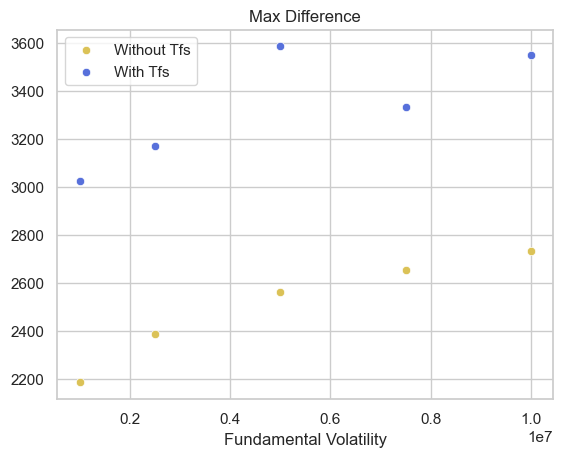

In [36]:
%%time

plot_no_trend = {}
plot_trend = {}

for obs_var in [1e6,2.5e6, 5e6, 7.5e6, 1e7]:
    print(f"obs_var: {obs_var}")
    for seed in range(20, 25):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        max_diff_nt = 0

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            max_diff_nt = max(max_diff_nt, abs(f[times_no_trend[i]] - prices_no_trend[i]))

        
        if obs_var not in plot_no_trend.keys():
            plot_no_trend[obs_var] = 0

        plot_no_trend[obs_var] += max_diff_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        max_diff_t = 0

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            max_diff_t = max(max_diff_t, abs(f[times_trend[i]] - prices_trend[i]))

        if obs_var not in plot_trend.keys():
            plot_trend[obs_var] = 0

        plot_trend[obs_var] += max_diff_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():
    X_nt.append(k)
    Y_nt.append(v / 5)


X_t = []
Y_t = []

for k, v in plot_trend.items():
    X_t.append(k)
    Y_t.append(v / 5)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental Volatility')
plt.ylabel('')
plt.title('Max Difference')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.9.a/"

# save plot
plt.savefig(base + f"6.10.a_SELL.png")


obs_var: 1000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 2500000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 5000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 7500000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 10000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
CPU times: user 2min 55s, sys: 31.5 s, total: 3min 27s
Wall time: 1min 24s


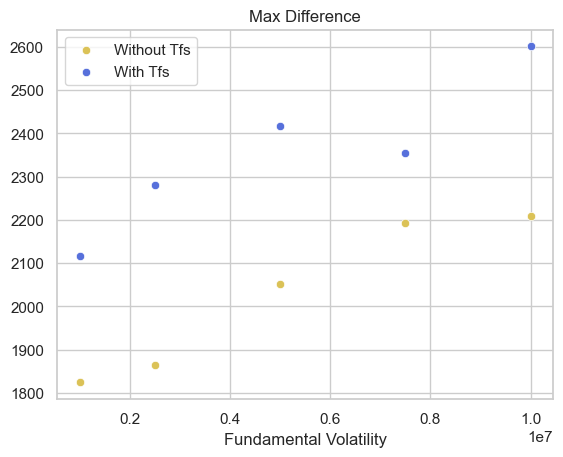

In [37]:
%%time

plot_no_trend = {}
plot_trend = {}

for obs_var in [1e6,2.5e6, 5e6, 7.5e6, 1e7]:
    print(f"obs_var: {obs_var}")
    for seed in range(20, 25):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = BUY,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        max_diff_nt = 0

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            max_diff_nt = max(max_diff_nt, abs(f[times_no_trend[i]] - prices_no_trend[i]))

        
        if obs_var not in plot_no_trend.keys():
            plot_no_trend[obs_var] = 0

        plot_no_trend[obs_var] += max_diff_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = BUY,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        max_diff_t = 0

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            max_diff_t = max(max_diff_t, abs(f[times_trend[i]] - prices_trend[i]))

        if obs_var not in plot_trend.keys():
            plot_trend[obs_var] = 0

        plot_trend[obs_var] += max_diff_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():
    X_nt.append(k)
    Y_nt.append(v / 5)


X_t = []
Y_t = []

for k, v in plot_trend.items():
    X_t.append(k)
    Y_t.append(v / 5)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental Volatility')
plt.ylabel('')
plt.title('Max Difference')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.10.a/"

# save plot
plt.savefig(base + f"6.10.a_BUY.png")


Figure 6.10.b - Pg 72

Notes: 
- Generating for both buy side and sell side shocks
- average max diference over 5 seeds
- inferring what the interval is, it not defined

obs_var: 1000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 2500000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 5000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 7500000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 10000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
CPU times: user 3min 7s, sys: 29.5 s, total: 3min 36s
Wall time: 1min 26s


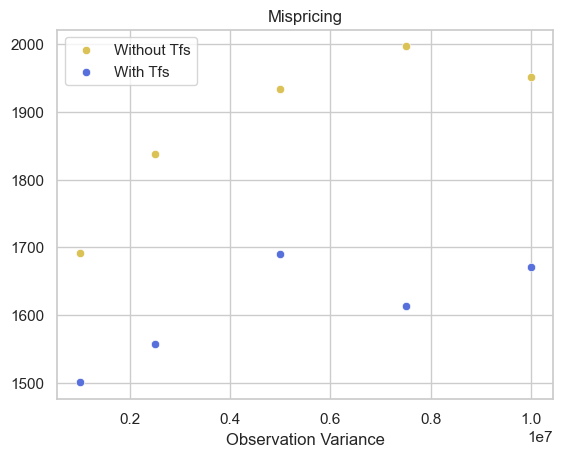

In [10]:
%%time

plot_no_trend = {}
plot_trend = {}

for obs_var in [1e6,2.5e6, 5e6, 7.5e6, 1e7]:
    print(f"obs_var: {obs_var}")
    for seed in range(20, 25):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )
        
        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

      
        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)
       
        if obs_var not in plot_no_trend.keys():
            plot_no_trend[obs_var] = 0

        plot_no_trend[obs_var] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            squared_diff_t.append((f[times_trend[i]] - prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if obs_var not in plot_trend.keys():
            plot_trend[obs_var] = 0

        plot_trend[obs_var] += rmsd_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    X_nt.append(k)
    Y_nt.append(v / 5)
    # print(k , v)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    X_t.append(k)
    Y_t.append(v / 5)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Observation Variance')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.10.b/"

# save plot
plt.savefig(base + f"6.10.b_SELL.png")


obs_var: 1000000.0
    Seed: 100
    Seed: 101
    Seed: 102
    Seed: 103
    Seed: 104
obs_var: 2500000.0
    Seed: 100
    Seed: 101
    Seed: 102
    Seed: 103
    Seed: 104
obs_var: 5000000.0
    Seed: 100
    Seed: 101
    Seed: 102
    Seed: 103
    Seed: 104
obs_var: 7500000.0
    Seed: 100
    Seed: 101
    Seed: 102
    Seed: 103
    Seed: 104
obs_var: 10000000.0
    Seed: 100
    Seed: 101
    Seed: 102
    Seed: 103
    Seed: 104
CPU times: user 3min 5s, sys: 29.5 s, total: 3min 35s
Wall time: 1min 25s


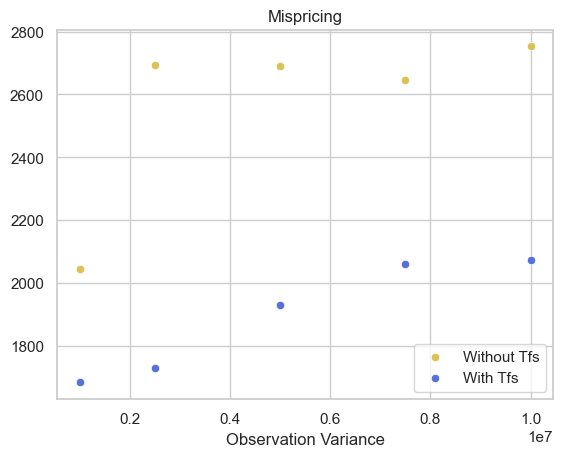

In [8]:
%%time

plot_no_trend = {}
plot_trend = {}

for obs_var in [1e6,2.5e6, 5e6, 7.5e6, 1e7]:
    print(f"obs_var: {obs_var}")
    for seed in range(100, 105):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e5,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )
        
        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

      
        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)
       
        if obs_var not in plot_no_trend.keys():
            plot_no_trend[obs_var] = 0

        plot_no_trend[obs_var] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            squared_diff_t.append((f[times_trend[i]] - prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if obs_var not in plot_trend.keys():
            plot_trend[obs_var] = 0

        plot_trend[obs_var] += rmsd_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    X_nt.append(k)
    Y_nt.append(v / 5)
    # print(k , v)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    X_t.append(k)
    Y_t.append(v / 5)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Observation Variance')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.10.b/"

# save plot
plt.savefig(base + f"6.10.b_BUY.png")
